In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames
# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

In [2]:
# Load the wholesale customers dataset
try:
    data = pd.read_csv("Data\Customer Segmentation - Income by Product.csv")
#    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print ("Wholesale customers dataset has {} samples with {} features each.")
except:
    print ("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has {} samples with {} features each.


In [3]:
data.columns

Index(['Customer', 'Total Income', 'SFL_Function_Skills', 'Building_Services',
       'Health_and_Social_Care', 'Business_Skills', 'Construction_Energy',
       'LBS', 'Hair', 'Employability', 'Learning', 'Hospitality', 'Utilities',
       'Transport_Maintenance', 'Engineering', 'Beauty', 'IT_Professional'],
      dtype='object')

In [4]:
data.drop(['Customer', 'Total Income', 'Hair', 'Employability', 'Learning', 'Hospitality', 'Utilities',
       'Transport_Maintenance', 'Engineering', 'Beauty', 'IT_Professional'], axis = 1, inplace = True)

In [5]:
data.fillna(0,inplace=True)
data.head()

,SFL_Function_Skills,Building_Services,Health_and_Social_Care,Business_Skills,Construction_Energy,LBS
0,0.0,0.0,0.0,0.0,0.0,0.0
1,15711.0,8178.0,0.0,25.0,7472.0,0.0
2,17801.0,34190.0,0.0,1862.0,29537.0,0.0
3,22518.0,40942.0,12205.0,0.0,66.0,0.0
4,0.0,40283.0,12328.0,607.0,0.0,0.0


In [6]:
# Display a description of the dataset
stats = data.describe()
stats

,SFL_Function_Skills,Building_Services,Health_and_Social_Care,Business_Skills,Construction_Energy,LBS
count,3479.000000,3479.000000,3479.000000,3479.000000,3479.000000,3479.000000
mean,3006.491521,2597.064099,1956.672607,1728.551308,1556.880425,1436.011210
std,11512.738828,11817.358982,16085.395885,13382.070381,6553.903305,10687.415032
min,-8.000000,-44.000000,-35.000000,-115.000000,-13.000000,-1364.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1563.500000,0.000000,0.000000,55.000000,0.000000,0.000000
max,338468.000000,241822.000000,744096.000000,620441.000000,134010.000000,229614.000000


#### Pairplot
Historgram for individual feature & scatter plot for combination

In [7]:
# Import Seaborn, a very powerful library for Data Visualisation
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


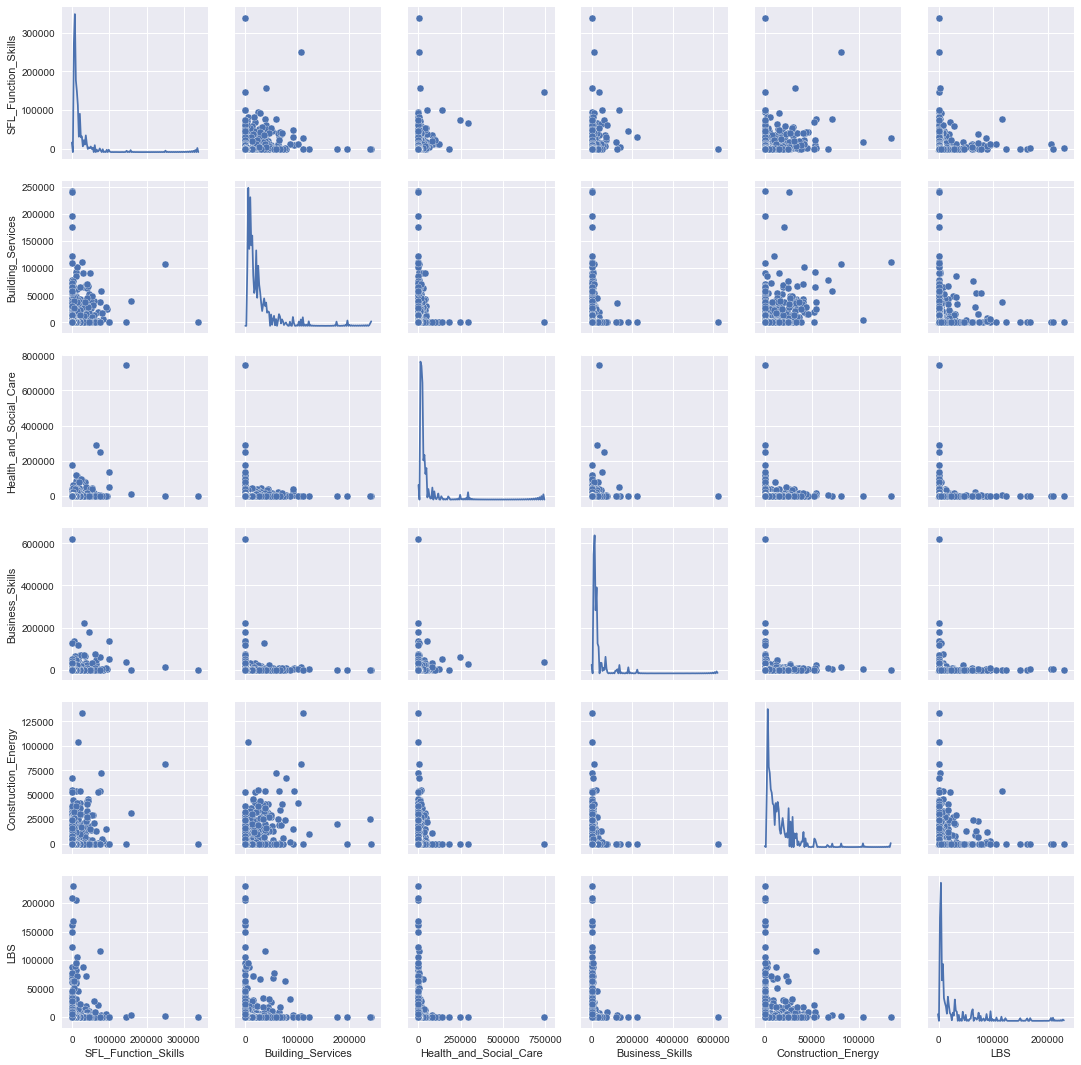

In [8]:
sns.pairplot(data, diag_kind = "kde")

#### Removing Outliers
value 0 and high revenue data skews data. Therefore, remove outliers ( value > mean + 3(constant) * std where value <> 0

In [9]:
std = 2.5
sfl_std = data['SFL_Function_Skills'][data['SFL_Function_Skills']>0].mean() + std*data['SFL_Function_Skills'][data['SFL_Function_Skills']>0].std()
build_std = data['Building_Services'][data['Building_Services']>0].mean() + std*data['Building_Services'][data['Building_Services']>0].std()
health_std = data['Health_and_Social_Care'][data['Health_and_Social_Care']>0].mean() + 3*data['Health_and_Social_Care'][data['Health_and_Social_Care']>0].std()
bizskill_std = data['Business_Skills'][data['Business_Skills']>0].mean() + std*data['Business_Skills'][data['Business_Skills']>0].std()
conenr_std = data['Construction_Energy'][data['Construction_Energy']>0].mean() + std*data['Construction_Energy'][data['Construction_Energy']>0].std()
lbs_std = data['LBS'][data['LBS']>0].mean() + std*data['LBS'][data['LBS']>0].std()


In [10]:
data_out = data[(data['SFL_Function_Skills']>=0)&(data['SFL_Function_Skills']<sfl_std)&
               (data['Building_Services']>=0)&(data['Building_Services']<build_std)&
                (data['Health_and_Social_Care']>=0)&(data['Health_and_Social_Care']<health_std)&
                (data['Business_Skills']>=0)&(data['Business_Skills']<bizskill_std)&
                (data['Construction_Energy']>=0)&(data['Construction_Energy']<conenr_std)&
                (data['LBS']>=0)&(data['LBS']<lbs_std)
               ]

In [11]:
# Display a description of the dataset
stats_out = data_out.describe()
stats_out

,SFL_Function_Skills,Building_Services,Health_and_Social_Care,Business_Skills,Construction_Energy,LBS
count,3396.000000,3396.000000,3396.000000,3396.000000,3396.000000,3396.000000
mean,2114.512956,1914.072733,1349.319494,1159.888104,1242.270612,843.977326
std,5544.309449,7409.974751,5873.214500,4705.775673,4804.742436,5345.799282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1402.250000,0.000000,0.000000,16.750000,0.000000,0.000000
max,47093.000000,76765.000000,97972.000000,70100.000000,43380.000000,77139.000000


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


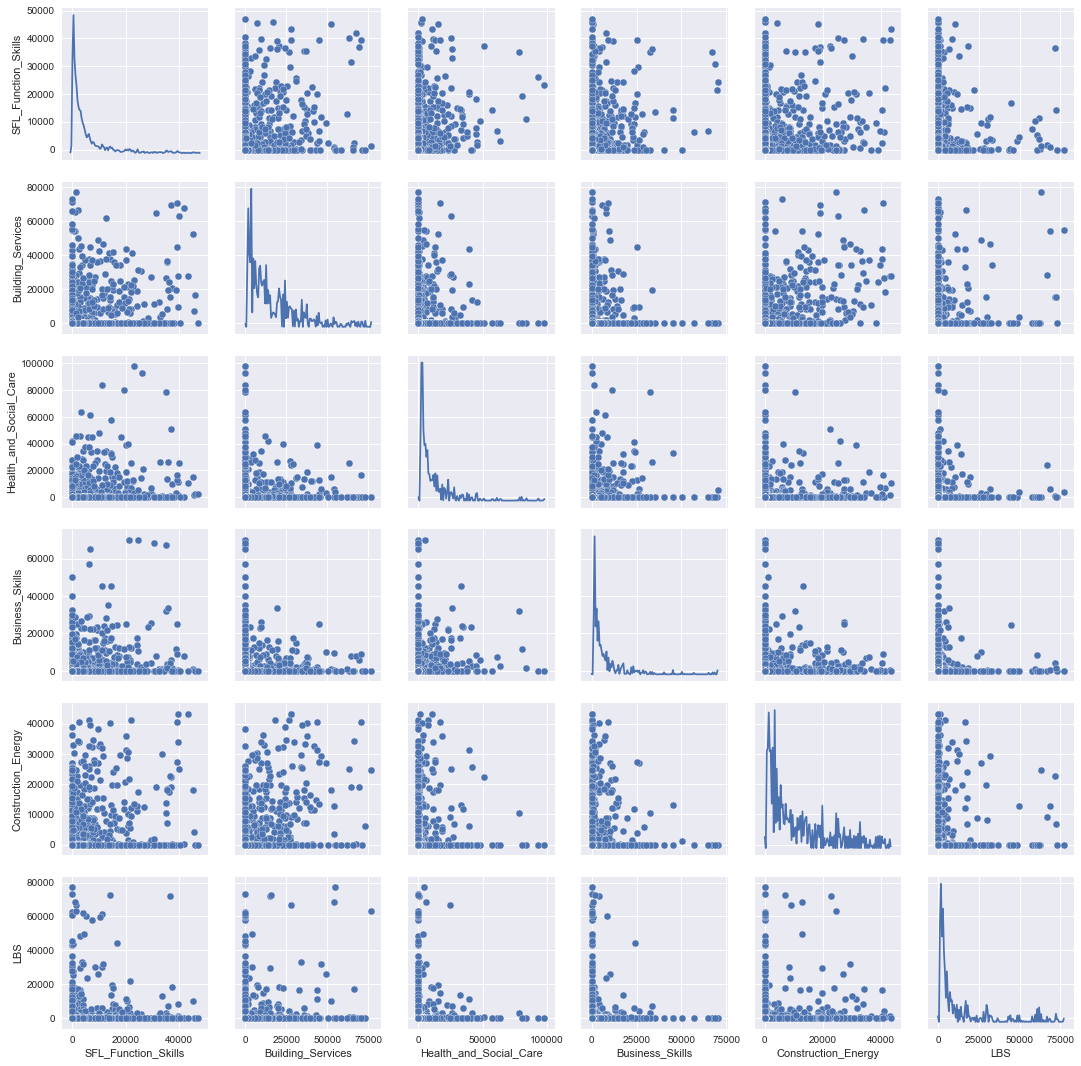

In [12]:
sns.pairplot(data_out, diag_kind = "kde")

#### Correlation Matrix
* This is to cross-reference with the scatter matrix above to draw more accurate insights from the data.
* The higher the color is on the bar, the higher the correlation.

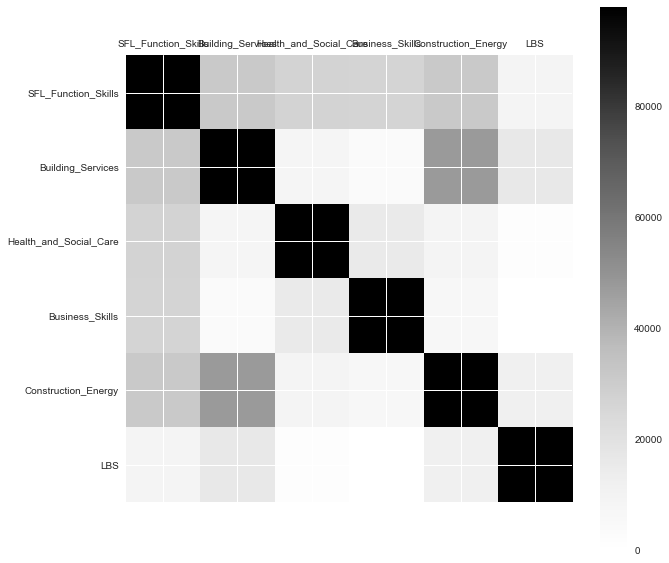

In [13]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(df, interpolation='nearest')
    ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);


plot_corr(data_out)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


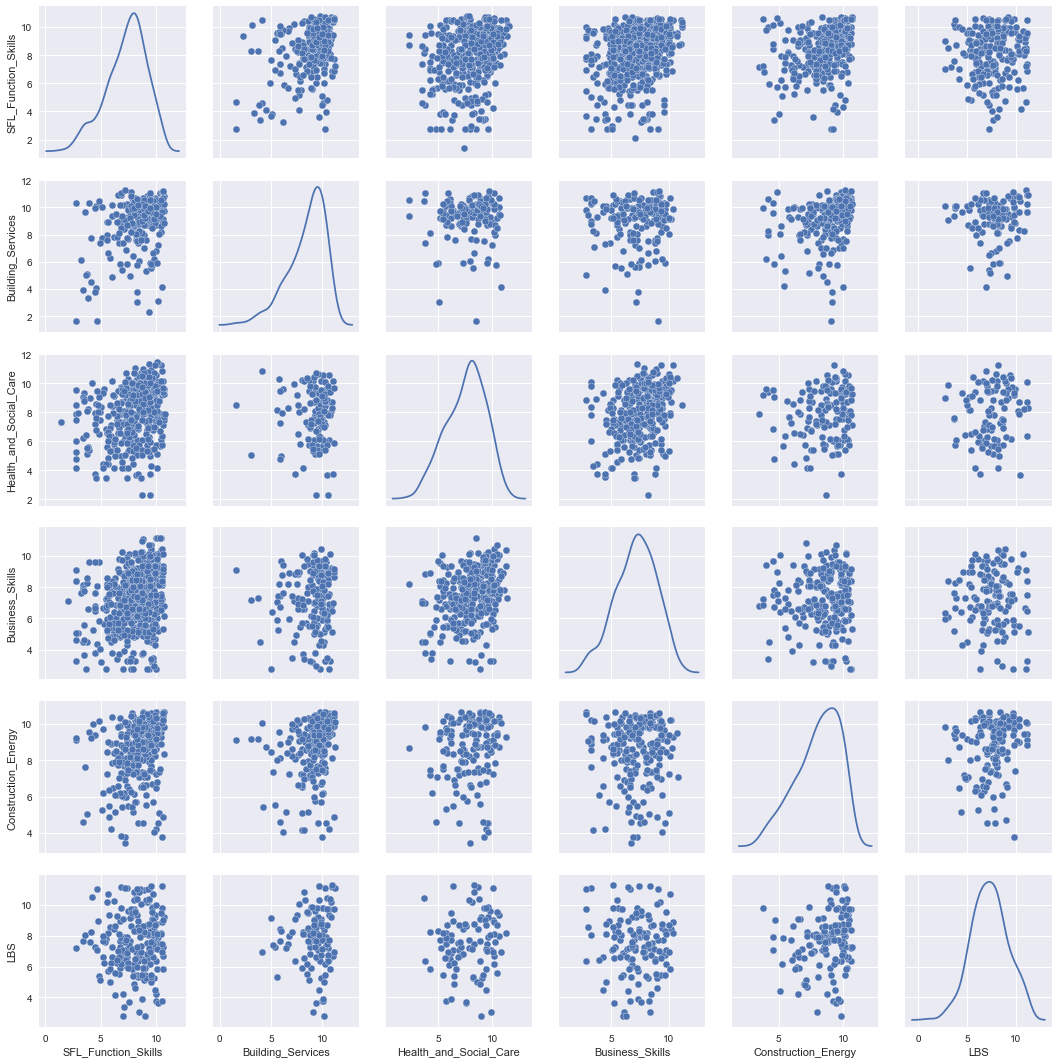

In [14]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data_out)

# Produce a scatter matrix for each pair of newly-transformed features
sns.pairplot(log_data, diag_kind = "kde")

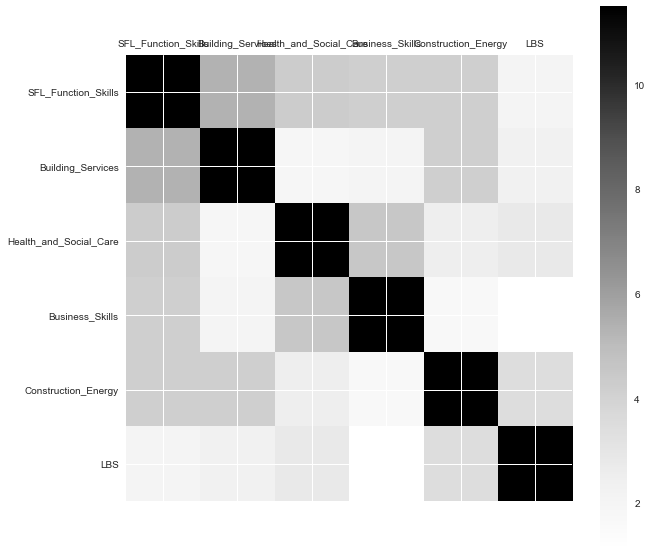

In [15]:
plot_corr(log_data)

#### Implement PCA

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

As we've noticed before it is difficult to visualize high dimensional data, we can use PCA to find the first two principal components, and visualize the data in this new, two-dimensional space, with a single scatter-plot. Before we do this though, we'll need to scale our data so that each feature has a single unit variance.

In [17]:
scaler = StandardScaler()
scaler.fit(data_out)
scaled_data = scaler.transform(data_out)

In [18]:
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

In [19]:
scaled_data.shape

(3396, 6)

In [20]:
x_pca.shape

(3396, 2)

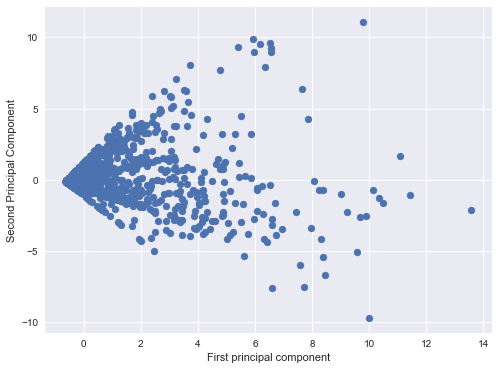

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

#### Interpreting the components

Unfortunately, with this great power of dimensionality reduction, comes the cost of being able to easily understand what these components represent.
The components correspond to combinations of the original features, the components themselves are stored as an attribute of the fitted PCA object:

In [22]:
pca.components_

array([[ 0.52172759,  0.50757114,  0.2994372 ,  0.26946281,  0.50714012,
         0.22518416],
       [ 0.23644654, -0.36701066,  0.50336287,  0.57187836, -0.31837012,
        -0.3572361 ]])

In this numpy matrix array, each row represents a principal component, and each column relates back to the original features. we can visualize this relationship with a heatmap:

In [23]:
df_comp = pd.DataFrame(pca.components_,columns=data_out.columns)

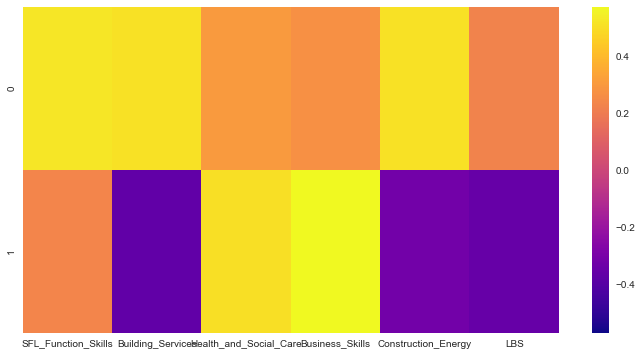

In [24]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

#### K Means Clustering
K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity.

##### Creating cluster

In [53]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(x_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [54]:
kmeans.cluster_centers_

array([[-0.35986843, -0.05376269],
       [ 4.71601954, -2.16643973],
       [ 2.61826306,  3.22461859]])

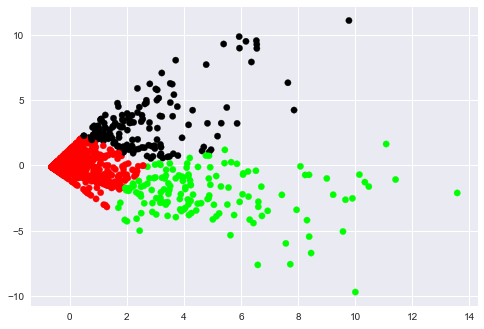

In [55]:
colormap = np.array(['red', 'lime', 'black','blue'])
plt.scatter(pd.DataFrame(x_pca)[0], pd.DataFrame(x_pca)[1], c=colormap[kmeans.labels_], s=40)

#### Remove centres with 0 value 
Because there are too many centres with 0 revenue, will look at centres with at least 3 more products

In [29]:
data_out.head()

,SFL_Function_Skills,Building_Services,Health_and_Social_Care,Business_Skills,Construction_Energy,LBS
0,0.0,0.0,0.0,0.0,0.0,0.0
1,15711.0,8178.0,0.0,25.0,7472.0,0.0
2,17801.0,34190.0,0.0,1862.0,29537.0,0.0
3,22518.0,40942.0,12205.0,0.0,66.0,0.0
4,0.0,40283.0,12328.0,607.0,0.0,0.0


In [31]:
data_out["Count"] = data_out.astype(bool).sum(axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [32]:
data_out.head()

,SFL_Function_Skills,Building_Services,Health_and_Social_Care,Business_Skills,Construction_Energy,LBS,Count
0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,15711.0,8178.0,0.0,25.0,7472.0,0.0,4
2,17801.0,34190.0,0.0,1862.0,29537.0,0.0,4
3,22518.0,40942.0,12205.0,0.0,66.0,0.0,4
4,0.0,40283.0,12328.0,607.0,0.0,0.0,3


In [44]:
data_rm = data_out[data_out["Count"]>=3]

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


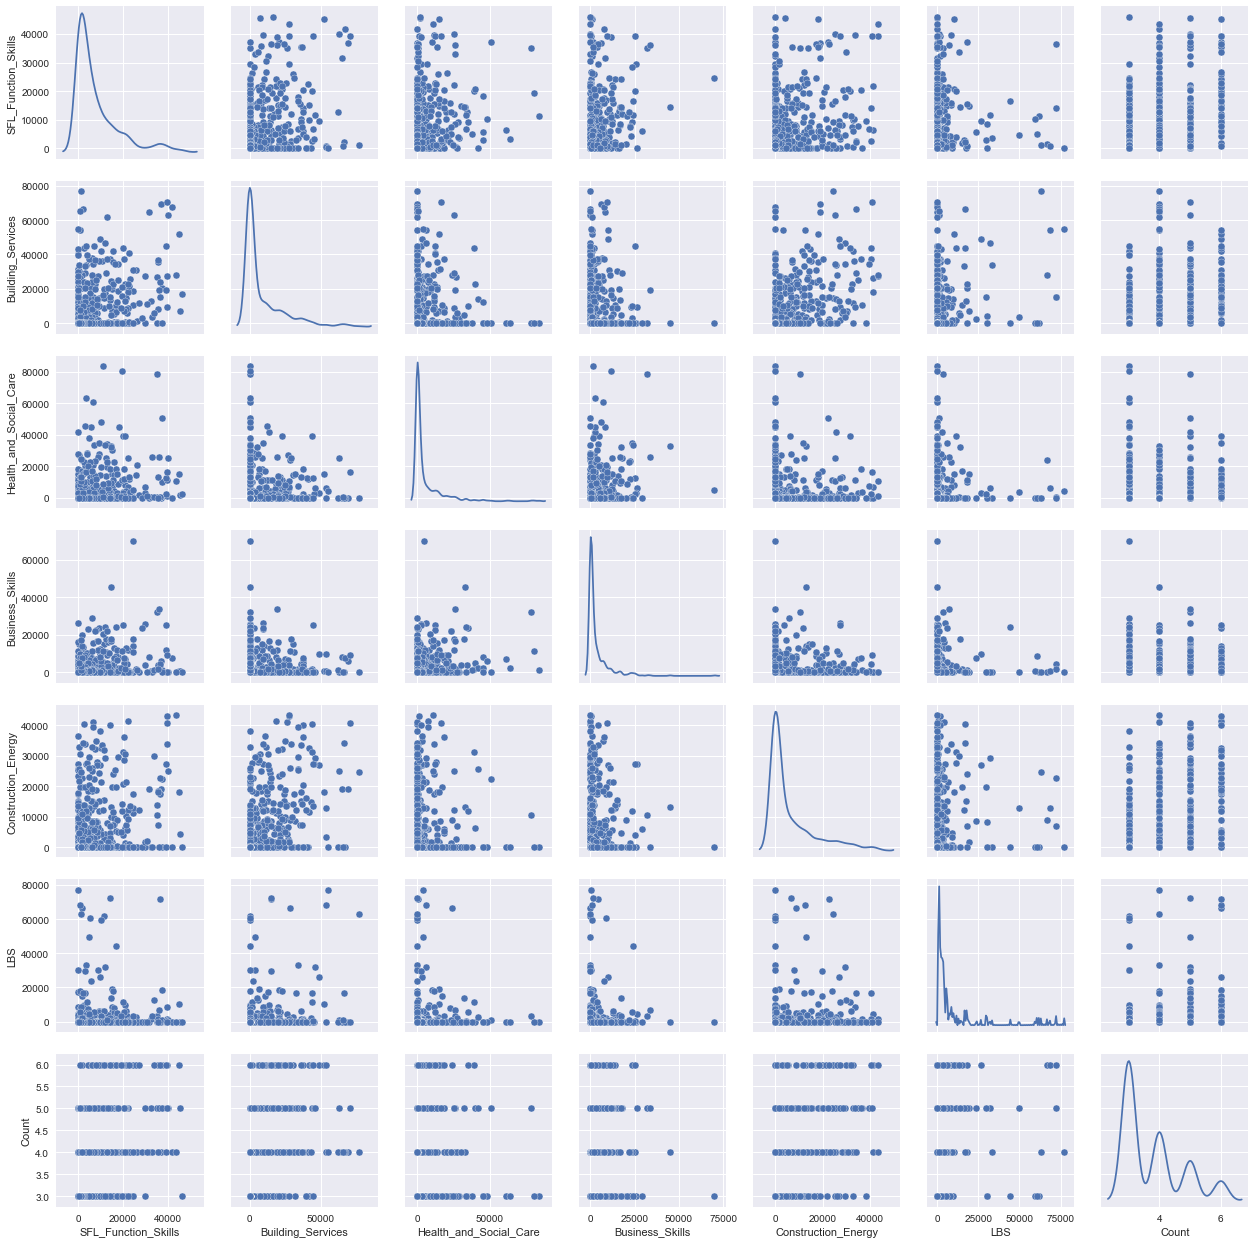

In [45]:
sns.pairplot(data_rm, diag_kind = "kde")

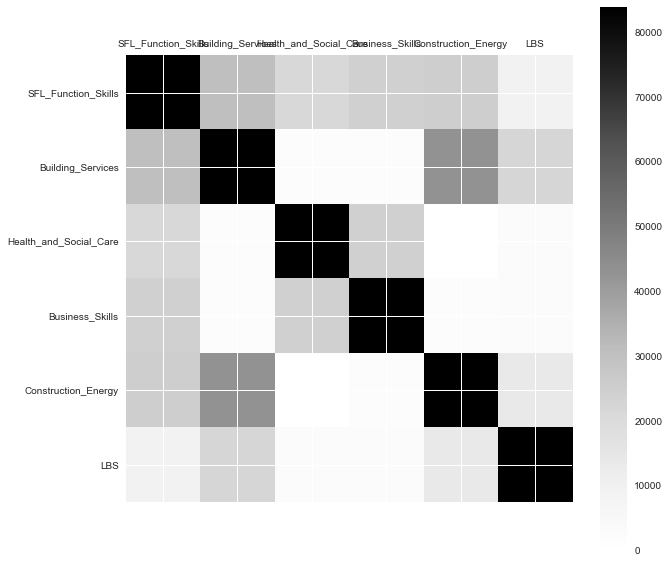

In [46]:
plot_corr(data_rm.drop(['Count'], axis = 1))